
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('predictsasc.xlsx')

In [3]:
## Cleaning up the data
df.columns=["Month","Value","Unnumbered","Unnumbered"]
df.head()

,Month,Value,Unnumbered,Unnumbered
0,2016-07-01,0.38,NaN,NaN
1,2016-08-01,3.09,NaN,NaN
2,2016-09-01,32.64,NaN,NaN
3,2016-10-01,48.57,NaN,NaN
4,2016-11-01,100.46,NaN,NaN


In [4]:
df.tail()

,Month,Value,Unnumbered,Unnumbered
66,2022-01-01,831993.11,NaN,NaN
67,2022-02-01,826843.00,NaN,NaN
68,2022-03-01,960581.66,NaN,NaN
69,2022-04-01,983302.27,NaN,NaN
70,2022-05-01,1041520.07,NaN,NaN


In [5]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [6]:
df.head()

,Month,Value,Unnumbered,Unnumbered
0,2016-07-01,0.38,NaN,NaN
1,2016-08-01,3.09,NaN,NaN
2,2016-09-01,32.64,NaN,NaN
3,2016-10-01,48.57,NaN,NaN
4,2016-11-01,100.46,NaN,NaN


In [7]:
df.set_index('Month',inplace=True)

In [8]:
df.head()

,Value,Unnumbered,Unnumbered
Month,,,
2016-07-01,0.38,NaN,NaN
2016-08-01,3.09,NaN,NaN
2016-09-01,32.64,NaN,NaN
2016-10-01,48.57,NaN,NaN
2016-11-01,100.46,NaN,NaN


In [9]:
df.describe()

,Value,Unnumbered,Unnumbered
count,7.100000e+01,0.0,0.0
mean,2.488948e+05,NaN,NaN
std,2.877004e+05,NaN,NaN
min,3.800000e-01,NaN,NaN
25%,1.437272e+04,NaN,NaN
50%,1.465664e+05,NaN,NaN
75%,4.035877e+05,NaN,NaN
max,1.041520e+06,NaN,NaN


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Month'>

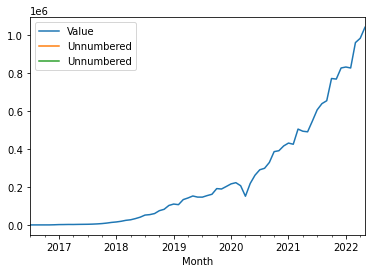

In [10]:
df.plot()

In [11]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Value'])

In [13]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [14]:
adfuller_test(df['Value'])

ADF Test Statistic : 3.326716928114109
p-value : 1.0
#Lags Used : 11
Number of Observations Used : 59
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [15]:
df['Value First Difference'] = df['Value'] - df['Value'].shift(1)

In [16]:
df['Value'].shift(1)

Month
2016-07-01          NaN
2016-08-01         0.38
2016-09-01         3.09
2016-10-01        32.64
2016-11-01        48.57
                ...    
2022-01-01    826848.22
2022-02-01    831993.11
2022-03-01    826843.00
2022-04-01    960581.66
2022-05-01    983302.27
Name: Value, Length: 71, dtype: float64

In [17]:
df['Seasonal First Difference']=df['Value']-df['Value'].shift(12)

In [18]:
df.head(14)

,Value,Unnumbered,Unnumbered,Value First Difference,Seasonal First Difference
Month,,,,,
2016-07-01,0.38,NaN,NaN,NaN,NaN
2016-08-01,3.09,NaN,NaN,2.71,NaN
2016-09-01,32.64,NaN,NaN,29.55,NaN
2016-10-01,48.57,NaN,NaN,15.93,NaN
2016-11-01,100.46,NaN,NaN,51.89,NaN
2016-12-01,707.93,NaN,NaN,607.47,NaN
2017-01-01,1696.22,NaN,NaN,988.29,NaN
2017-02-01,1937.71,NaN,NaN,241.49,NaN
2017-03-01,2425.14,NaN,NaN,487.43,NaN


In [19]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : 2.360585222047919
p-value : 0.9989905369158489
#Lags Used : 2
Number of Observations Used : 56
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

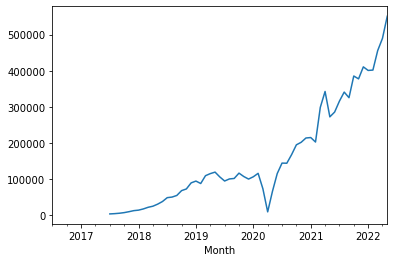

In [20]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
![image.png](attachment:image.png)

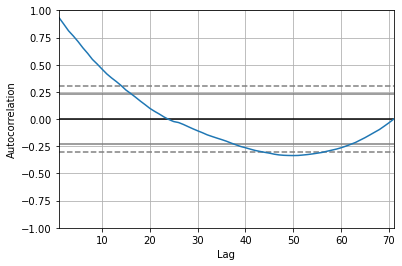

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Value'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api

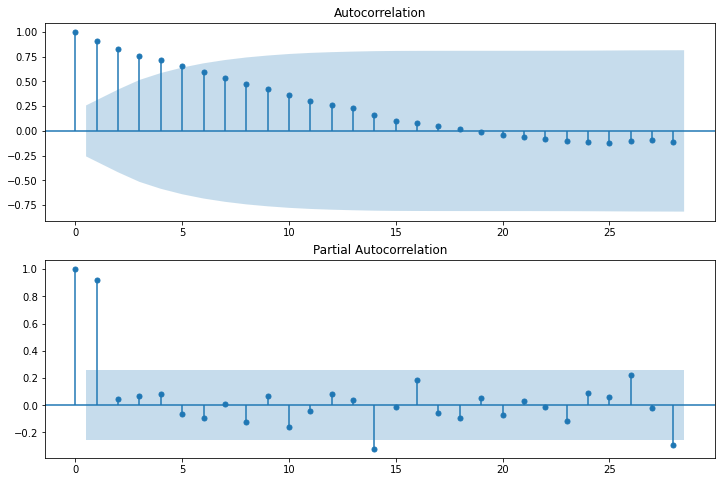

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=28,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=28,ax=ax2)

In [27]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model=ARIMA(df['Value'],order=(1,1,1))
model_fit=model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [29]:
model_fit.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                   70
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -935.653
Method:                       css-mle   S.D. of innovations         154433.552
Date:                Tue, 14 Jun 2022   AIC                           1879.307
Time:                        23:37:54   BIC                           1888.301
Sample:                    08-01-2016   HQIC                          1882.879
                         - 05-01-2022                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.664e+05        nan        nan        nan         nan         nan
ar.L1.D.Value     0.9999        nan        nan        nan         nan         nan
ma.L1.D.Value    -1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

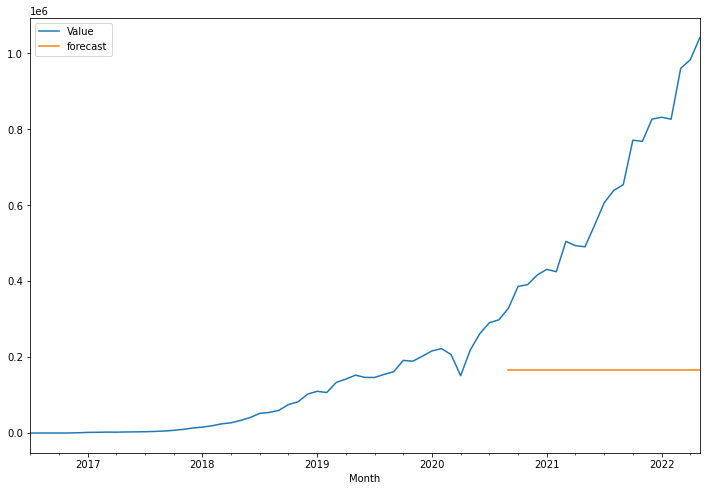

In [30]:
df['forecast']=model_fit.predict(start=50,end=72,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [31]:
import statsmodels.api as sm

In [32]:
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<AxesSubplot:xlabel='Month'>

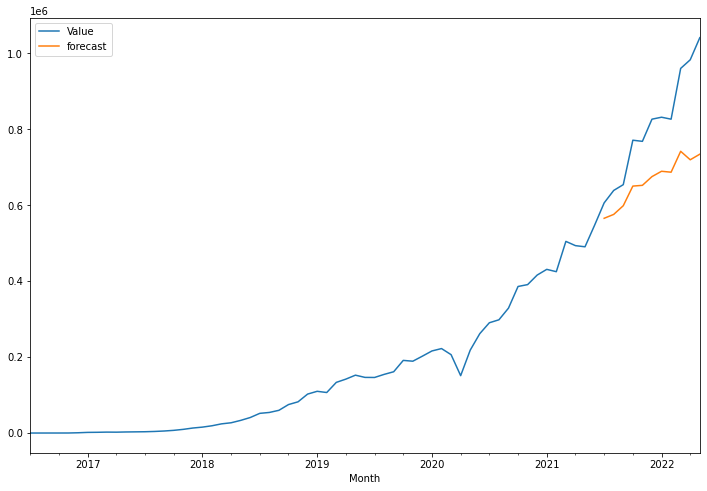

In [33]:
df['forecast']=results.predict(start=60,end=72,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [34]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [35]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [36]:
future_datest_df.tail()

,Value,Unnumbered,Unnumbered,Value First Difference,Seasonal First Difference,forecast
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

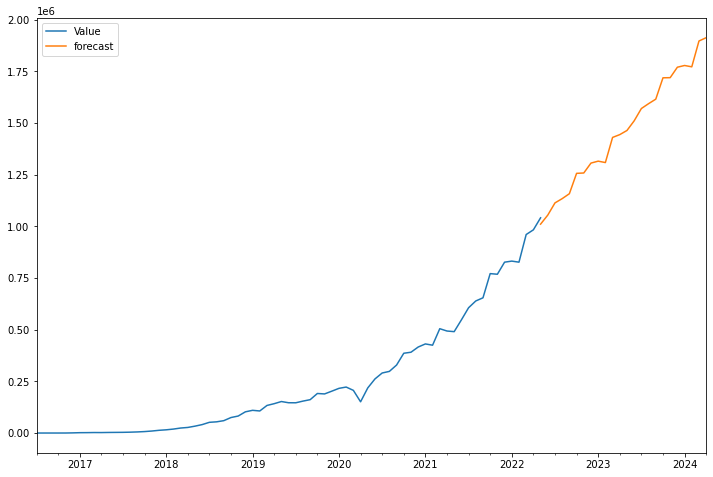

In [41]:
future_df['forecast'] = results.predict(start = 70, end = 120, dynamic= True)  
future_df[['Value', 'forecast']].plot(figsize=(12, 8)) 